In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import os


In [10]:
def function_1(x):
  return (np.sin(5 * (np.pi) * x)) / (5 * np.pi * x)

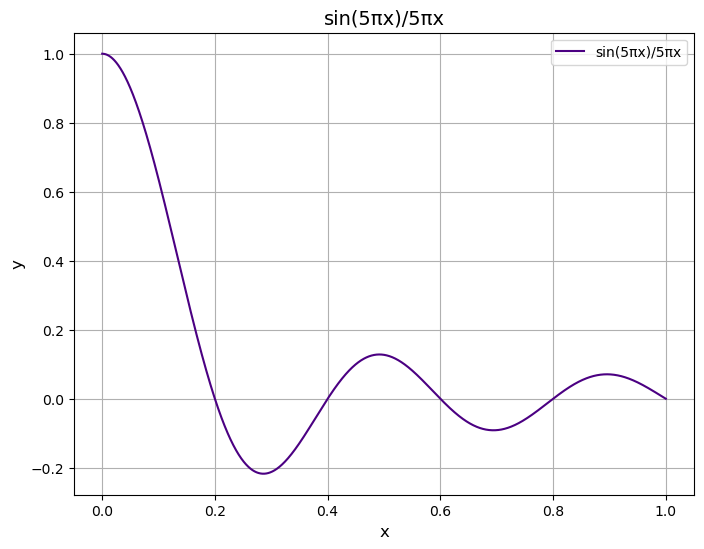

In [11]:
# Generating input values
x_values = np.linspace(1e-4, 1, 2000).reshape(-1, 1)  
y_values = function_1(x_values)

# Converting the data
func1_x = torch.from_numpy(x_values).float()  
func1_y = torch.from_numpy(y_values).float()

# Plotting the SinC curve
plt.figure(figsize=(8, 6))
plt.plot(func1_x, func1_y, color='Indigo', label='sin(5πx)/5πx')
plt.title(r'sin(5πx)/5πx', fontsize=14)  
plt.xlabel('x', fontsize=12)  
plt.ylabel('y', fontsize=12)


plt.grid(True)
plt.legend()
plt.show()

In [12]:
# Defined the model with 8 hidden layers, followed by ReLU Activation function, and them providing the neurons as per the example given in the Canvas
# [1, 5, 10, 5, 1]

class FirstDNNModel(nn.Module):
    def __init__(self):
        super(FirstDNNModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 5),
            nn.ReLU(),
            nn.Linear(5, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, input_data):
        return self.layers(input_data)

        

In [13]:
# Defined the model with 5 hidden layers, followed by ReLU Activation function, and them providing the neurons as per the example given in the Canvas
# [1, 10, 18, 15, 4]

class SecondDNNModel(nn.Module):
    def __init__(self):
        super(SecondDNNModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 10),
            nn.ReLU(),
            nn.Linear(10, 18),
            nn.ReLU(),
            nn.Linear(18, 15),
            nn.ReLU(),
            nn.Linear(15, 4),
            nn.ReLU(),
            nn.Linear(4, 1)
        )

    def forward(self, input_data):
        return self.layers(input_data)


In [14]:
# Defined the model with 2 hidden layers, followed by ReLU Activation function, and them providing the neurons as per the example given in the Canvas
# [1, 190]

class ThirdDNNModel(nn.Module):
    def __init__(self):
        super(ThirdDNNModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 190),
            nn.ReLU(),
            nn.Linear(190, 1)
        )

    def forward(self, input_data):
        return self.layers(input_data)

In [15]:
# I have considered MSELoss() model, since the functions are non-linear and continuous, I felt MSELoss() would be more suitable
# And for optimizer, I have used Adam, and gave a learning rate of '1e-4', and trained the model for 20000 epochs.
# Also, when the latest loss would fall less than 0.01, I would stop training the model, considering that model is enough trained and approximated 
# To the function. 

def training_the_model(network, input_data, target_data):
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(network.parameters(), lr=1e-4)
    max_epochs = 20000
    loss_track = []

    for epoch in range(max_epochs):
        network.train()
        predicted_output = network(input_data)
        loss = loss_function(predicted_output, target_data)  

        optimizer.zero_grad()  
        loss.backward()  
        optimizer.step()

        loss_track.append(loss.item())

        if epoch % 1000 == 0:
            print(f'Epoch {epoch}/{max_epochs}, Loss: {loss.item()}')

        # Early stopping based on a convergence criterion
        if loss_track[-1] < 0.001:
            print("Achieved the convergence, training is now stopped!")
            break

    return loss_track

In [16]:
# Initializing and Training the models

model_one = FirstDNNModel()
model_one_losses = training_the_model(model_one, func1_x, func1_y)  # Training the first model


model_two = SecondDNNModel()
model_two_losses = training_the_model(model_two, func1_x, func1_y)  # Training the second model


model_three = ThirdDNNModel()
model_three_losses = training_the_model(model_three, func1_x, func1_y)  # Training the third model


models = [FirstDNNModel(), SecondDNNModel(), ThirdDNNModel()] 
model_losses = []

for i, model in enumerate(models, start=1):
    print(f"Training Model {i}")
    losses = training_the_model(model, func1_x, func1_y) 
    model_losses.append(losses)


Epoch 0/20000, Loss: 0.19729375839233398
Epoch 1000/20000, Loss: 0.09285710006952286
Epoch 2000/20000, Loss: 0.046539414674043655
Epoch 3000/20000, Loss: 0.007728449534624815
Epoch 4000/20000, Loss: 0.007401544600725174
Epoch 5000/20000, Loss: 0.004806152079254389
Epoch 6000/20000, Loss: 0.0033605804201215506
Epoch 7000/20000, Loss: 0.002616674406453967
Epoch 8000/20000, Loss: 0.0019321658182889223
Achieved the convergence, training is now stopped!
Epoch 0/20000, Loss: 0.16624639928340912
Epoch 1000/20000, Loss: 0.04445513337850571
Epoch 2000/20000, Loss: 0.011271899566054344
Epoch 3000/20000, Loss: 0.007750307209789753
Epoch 4000/20000, Loss: 0.005889105144888163
Epoch 5000/20000, Loss: 0.005261066369712353
Epoch 6000/20000, Loss: 0.004396022297441959
Epoch 7000/20000, Loss: 0.0032986225560307503
Epoch 8000/20000, Loss: 0.0026203813031315804
Epoch 9000/20000, Loss: 0.0019943786319345236
Achieved the convergence, training is now stopped!
Epoch 0/20000, Loss: 0.11215870827436447
Epoch 1

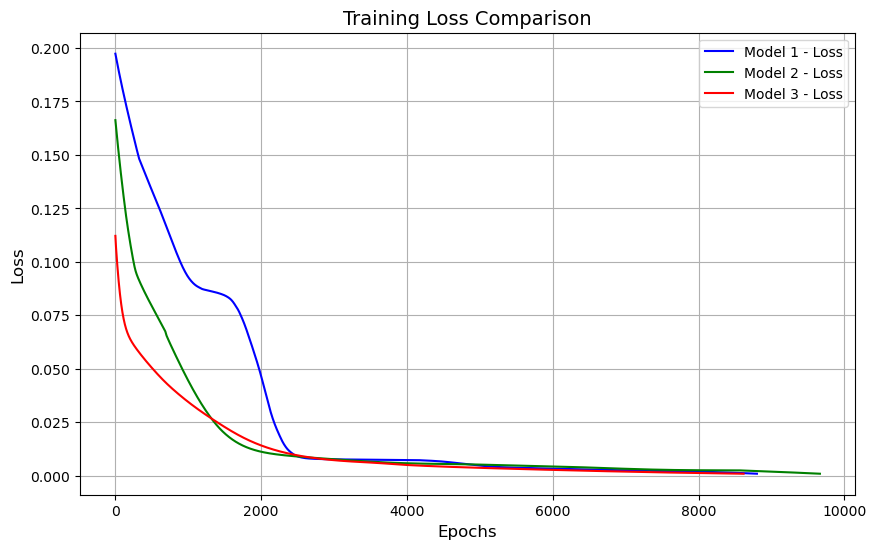

In [17]:
# Plotting the loss values for all three models.

plt.figure(figsize=(10, 6))

plt.plot(model_one_losses, label='Model 1 - Loss', color='blue', linewidth=1.5)
plt.plot(model_two_losses, label='Model 2 - Loss', color='green', linewidth=1.5)
plt.plot(model_three_losses, label='Model 3 - Loss', color='red', linewidth=1.5)


plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Comparison', fontsize=14)  # Added a title for better context
plt.legend(fontsize=10)


plt.grid(True)


plt.show()


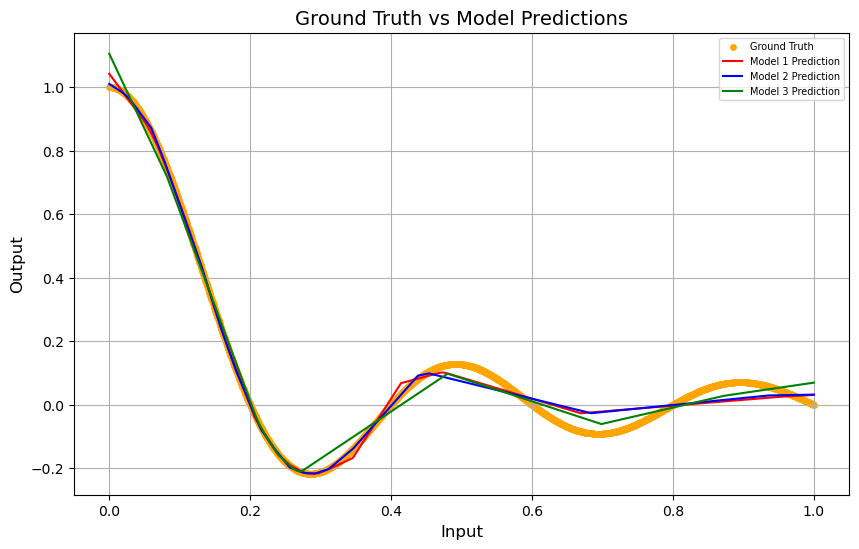

In [18]:
# Evaluating the models and generating predictions

with torch.no_grad():
    model_one.eval()
    model_two.eval()
    model_three.eval()

    predictions_model1 = model_one(func1_x)
    predictions_model2 = model_two(func1_x)
    predictions_model3 = model_three(func1_x)


plt.figure(figsize=(10, 6))


plt.scatter(func1_x, func1_y, label='Ground Truth', marker='o', color="orange", s=15)


plt.plot(func1_x, predictions_model1.detach().numpy(), label='Model 1 Prediction', color="r", linewidth=1.5)
plt.plot(func1_x, predictions_model2.detach().numpy(), label='Model 2 Prediction', color="b",linewidth=1.5)
plt.plot(func1_x, predictions_model3.detach().numpy(), label='Model 3 Prediction', color="g",  linewidth=1.5)


plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.title('Ground Truth vs Model Predictions', fontsize=14)


plt.legend(fontsize=7)
plt.grid(True)
plt.show()


In [19]:
def function_2(x):
  return np.sign(np.sin(5*np.pi*x))

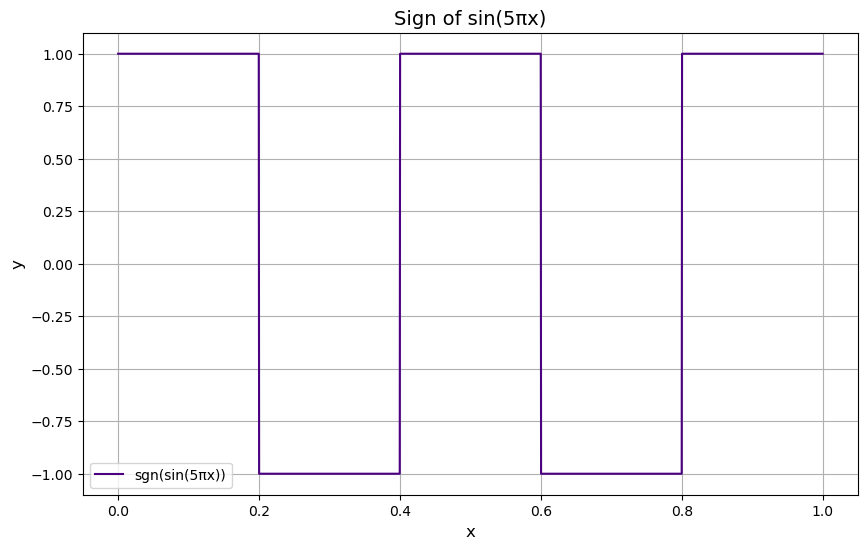

In [20]:
# Generating input values using linspace 

x_values = np.linspace(1e-4, 1, 2000).reshape(-1, 1)
y_values = function_2(x_values)  


func2_x = torch.from_numpy(x_values).float() 
func2_y = torch.from_numpy(y_values).float()


plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(func2_x, func2_y, color='indigo', label='sgn(sin(5πx))')  
plt.title(r'Sign of sin(5πx)', fontsize=14)  
plt.xlabel('x', fontsize=12)  
plt.ylabel('y', fontsize=12)  


plt.grid(True)
plt.legend()
plt.show()


In [21]:
# Initializing and Training the models for SinG function. 

model_one = FirstDNNModel()
model_one_losses = training_the_model(model_one, func2_x, func2_y)  # Training the first model


model_two = SecondDNNModel()
model_two_losses = training_the_model(model_two, func2_x, func2_y)  # Training the second model


model_three = ThirdDNNModel()
model_three_losses = training_the_model(model_three, func2_x, func2_y)  # Training the third model


models = [FirstDNNModel(), SecondDNNModel(), ThirdDNNModel()] 
model_losses = []

for i, model in enumerate(models, start=1):
    print(f"Training Model {i}")
    losses = training_the_model(model, func2_x, func2_y) 
    model_losses.append(losses)

Epoch 0/20000, Loss: 0.9673335552215576
Epoch 1000/20000, Loss: 0.9569358229637146
Epoch 2000/20000, Loss: 0.6606860160827637
Epoch 3000/20000, Loss: 0.535383939743042
Epoch 4000/20000, Loss: 0.1201702207326889
Epoch 5000/20000, Loss: 0.0647578090429306
Epoch 6000/20000, Loss: 0.05155998840928078
Epoch 7000/20000, Loss: 0.038265109062194824
Epoch 8000/20000, Loss: 0.024816930294036865
Epoch 9000/20000, Loss: 0.016373107209801674
Epoch 10000/20000, Loss: 0.011463833972811699
Epoch 11000/20000, Loss: 0.00887532439082861
Epoch 12000/20000, Loss: 0.0077478233724832535
Epoch 13000/20000, Loss: 0.006619180087000132
Epoch 14000/20000, Loss: 0.005545679945498705
Epoch 15000/20000, Loss: 0.004810479003936052
Epoch 16000/20000, Loss: 0.004432100802659988
Epoch 17000/20000, Loss: 0.0039956155233085155
Epoch 18000/20000, Loss: 0.003522111801430583
Epoch 19000/20000, Loss: 0.0030374580528587103
Epoch 0/20000, Loss: 1.0756813287734985
Epoch 1000/20000, Loss: 1.0117229223251343
Epoch 2000/20000, Loss

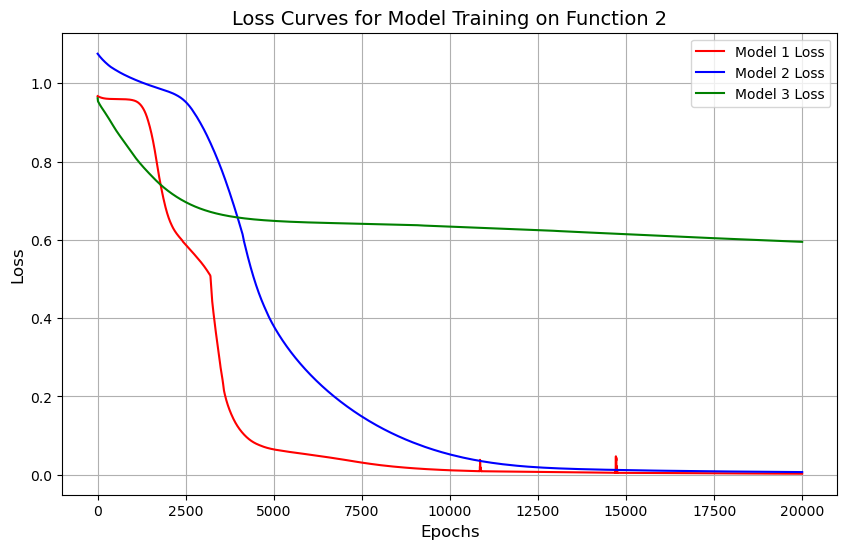

In [22]:
# Plotting the loss values for all three models 

plt.figure(figsize=(10, 6))


plt.plot(model_one_losses, label='Model 1 Loss', color='red', linewidth=1.5)
plt.plot(model_two_losses, label='Model 2 Loss', color='blue', linewidth=1.5)
plt.plot(model_three_losses, label='Model 3 Loss', color='green', linewidth=1.5)


plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Curves for Model Training on Function 2', fontsize=14)  
plt.legend(fontsize=10)


plt.grid(True)
plt.show()


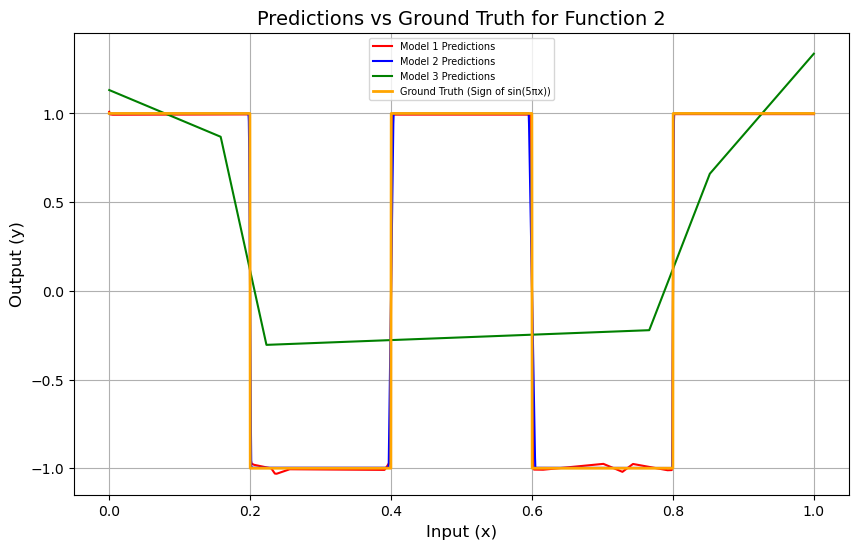

In [23]:
# Evaluating the models and generating predictions

with torch.no_grad():
    model_one.eval()
    model_two.eval()
    model_three.eval()

    predictions_model1 = model_one(func2_x)
    predictions_model2 = model_two(func2_x)
    predictions_model3 = model_three(func2_x)

    
plt.figure(figsize=(10, 6))


plt.plot(func2_x, predictions_model1.detach().numpy(), label='Model 1 Predictions', color="r", linewidth=1.5)
plt.plot(func2_x, predictions_model2.detach().numpy(), label='Model 2 Predictions', color="b", linewidth=1.5)
plt.plot(func2_x, predictions_model3.detach().numpy(), label='Model 3 Predictions', color="g", linewidth=1.5)

plt.plot(func2_x, func2_y, label='Ground Truth (Sign of sin(5πx))', color="orange", linewidth=2)

plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output (y)', fontsize=12)
plt.title('Predictions vs Ground Truth for Function 2', fontsize=14)


plt.legend(fontsize=7)
plt.grid(True)
plt.show()
